In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')


In [2]:
airlines = pd.read_excel("D:\\Downloads\\Prajnya\\Assignments\\18.Forecasting\\Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
airlines.shape

(96, 2)

In [4]:
airlines['Month'] = pd.to_datetime(airlines['Month'],infer_datetime_format=True)
airlines = airlines.set_index(['Month'])

In [5]:
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

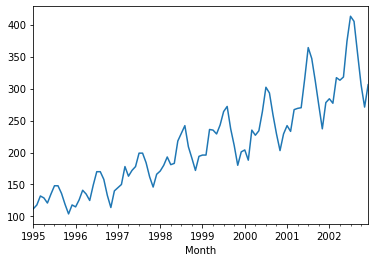

In [6]:
airlines.Passengers.plot()

In [7]:
len(airlines['Passengers'])

96

### Splitting data

In [8]:
Train = airlines.head(84)
Test = airlines.tail(12)

### Moving Average

In [9]:
list(range(2,24,6))

[2, 8, 14, 20]

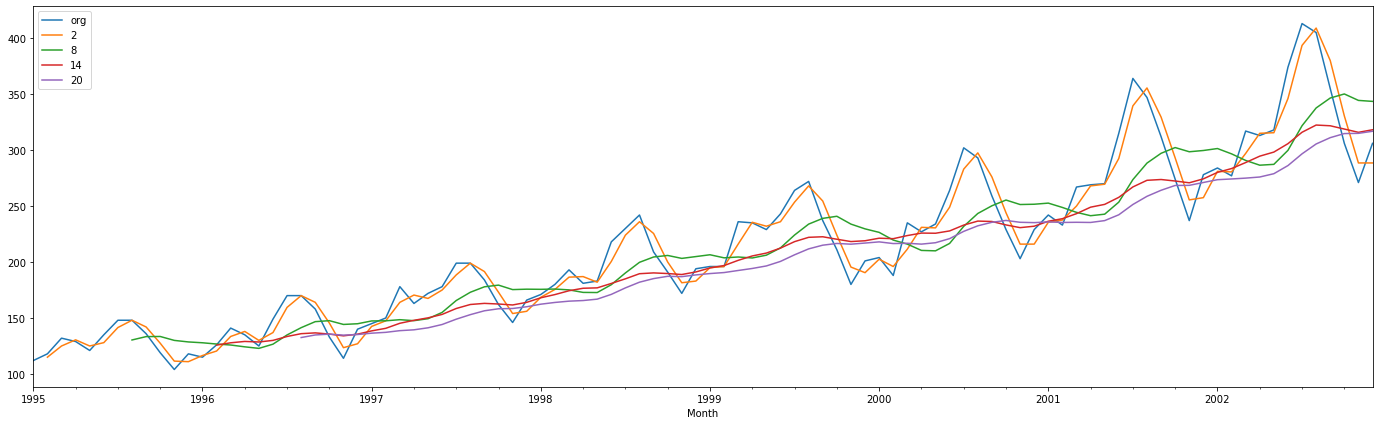

In [10]:
plt.figure(figsize=(24,7))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

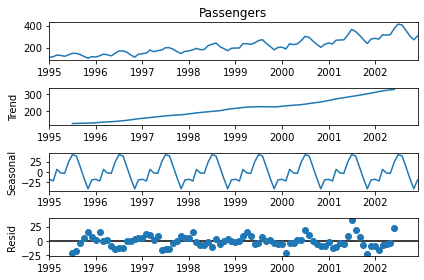

In [11]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

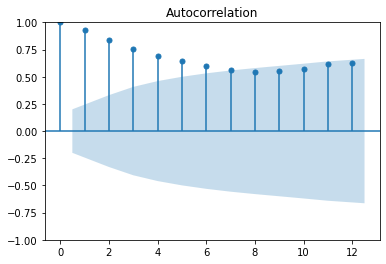

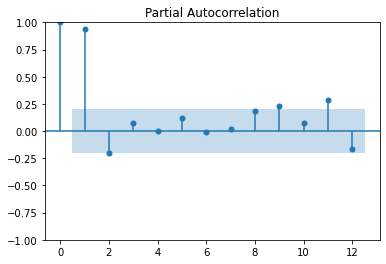

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE

In [13]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [14]:
df=pd.DataFrame()
df['Passengers']=airlines["Passengers"]
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['WMA'] = df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Passengers,WMA
Month,,
1995-01-01,112,NaN
1995-02-01,118,NaN
1995-03-01,132,NaN
1995-04-01,129,126.0
1995-05-01,121,125.3
...,...,...
2002-08-01,405,392.5
2002-09-01,355,383.5
2002-10-01,306,351.2


### Simple Exponential Smoothing

In [15]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.41127474051367

### Holt Method

In [16]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.2, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

10.467081964496895

### Holts winter exponential smoothing with additive seasonality and additive trend

In [17]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730286880515042

### Holts winter exponential smoothinh with multiplicative seasonality and additive trend

In [18]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

2.821091342486879

### Final model by combining train and test

In [19]:
hwe_model_mul_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit()

In [20]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

2003-01-01    312.899560
2003-02-01    308.171547
2003-03-01    355.533060
2003-04-01    345.770145
2003-05-01    345.696478
2003-06-01    392.471215
2003-07-01    436.501917
2003-08-01    429.859801
2003-09-01    380.173448
2003-10-01    332.317859
Freq: MS, dtype: float64